# CIFAR10 & BatchNormalization

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

<img src="https://www.researchgate.net/profile/Jean-Elsner/publication/329969195/figure/fig1/AS:708799606317059@1546002403551/Images-from-the-CIFAR-10-13-dataset-and-their-corresponding-classes-CIFAR-10.ppm" width="1600">



In [2]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,BatchNormalization,Activation, Flatten
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
# !git clone https://github.com/YoongiKim/CIFAR-10-images.git

# import tensorflow

# # Definisci il percorso delle cartelle contenenti le immagini di addestramento e test
# train_data_dir = "/content/CIFAR-10-images/train"
# test_data_dir = "/content/CIFAR-10-images/test"

# # Imposta alcuni parametri, come dimensione delle immagini e batch size
# image_size = (32, 32)
# batch_size = 32

# # Crea il dataset di addestramento
# train_dataset = tensorflow.keras.utils.image_dataset_from_directory(
#     train_data_dir,
#     labels="cifar10",
#     label_mode="int",
#     image_size=image_size,
#     batch_size=batch_size,
#     shuffle=True,
#     seed=667,
#     validation_split=None,
#     subset=None
#     )

# # Crea il dataset di test
# test_dataset = tensorflow.keras.utils.image_dataset_from_directory(
#     test_data_dir,
#     labels="cifar10",
#     label_mode="int",
#     image_size=image_size,
#     batch_size=batch_size
#     )

# # Ora puoi accedere ai dati di addestramento e test tramite il dataset creato
# (X_train, y_train) = next(iter(train_dataset))
# (X_test, y_test) = next(iter(test_dataset))

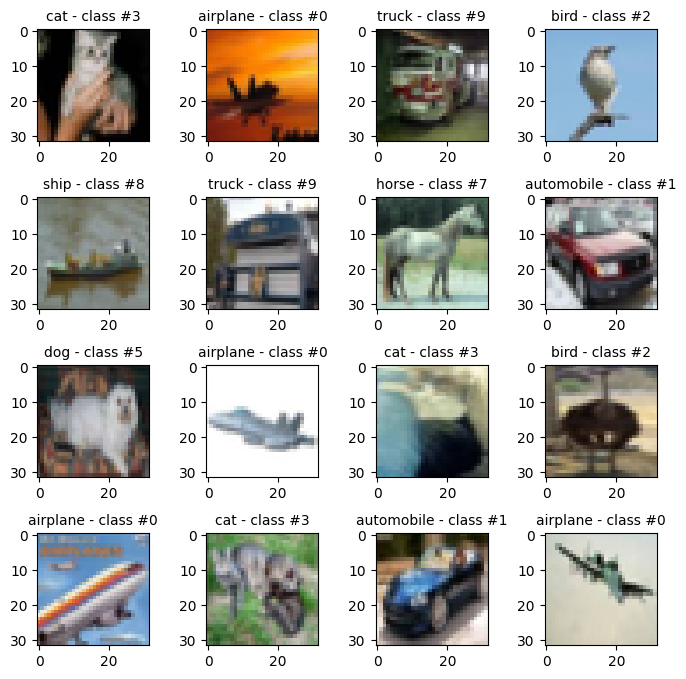

In [4]:
# Define class names
class_names = [
            'airplane',  # 0
            'automobile',  # 1
            'bird',  # 2
            'cat',  # 3
            'deer',  # 4
            'dog',  # 5
            'frog',  # 6
            'horse',  # 7
            'ship',  # 8
            'truck'  # 9
            ]

# Function to plot a grid of images
def plot_images(images, labels, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(8, 8),
                            gridspec_kw={'wspace': 0.5, 'hspace': 0.5})
    for i in range(rows):
        for j in range(cols):
            index = np.random.randint(0, len(images))
            ax = axes[i, j]
            ax.imshow(images[index])
            ax.set_title(f"{class_names[labels[index][0]]} - class #{labels[index][0]}", fontsize=10)
    plt.show()

# Specify the number of rows and columns for the grid
num_rows = 4
num_cols = 4

# Call the plot_images function to display a grid of images with tickers
plot_images(X_train, y_train, num_rows, num_cols)

In [5]:
NUM_CLASSES = np.unique(y_train).size

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

## to use the loss=categorical_crossentropy
y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

## Batch Normalization
Batch Normalization (BN) is a technique used in artificial neural networks for regularization and normalization. It was introduced to improve the stability and efficiency of training deep neural networks. Here's how it works and what its main objectives are:

- Minibatch Normalization: during the training of a neural network, data is divided into minibatches of examples. Batch Normalization normalizes each minibatch by calculating the mean and standard deviation of activation values within the minibatch. This process normalizes the data to have a mean of zero and a standard deviation of one.

- Addressing the Distribution Shift Problem: One of the main issues in training deep neural networks is the shift in the distribution of data as it passes through different layers of the network. Batch Normalization mitigates this issue by ensuring that the input data for each layer has a more consistent distribution, thus facilitating the convergence of the model.

- Regularization: Batch Normalization also acts as a regularizer since it introduces some noise into the data through minibatch normalization. This helps reduce overfitting, allowing models to generalize better to new data.

- Training Speedup: Batch Normalization can accelerate the training of a network by allowing the use of higher learning rates. Normalizing input data at each layer reduces the risk of issues such as gradient explosion.

Batch Normalization is usually applied between the linear layer (such as a Fully Connected or Convolutional layer) and the activation function (e.g., ReLU or LeakyReLU). It can be used in various types of neural networks, including Convolutional Neural Networks (CNNs) and fully connected neural networks.

https://zaffnet.github.io/batch-normalization


<img src="https://zaffnet.github.io/assets/batchnorm/batchnorm.jpg" width="1600">


## 2. Build the model Classic and Tensorflow way

In [6]:
model = Sequential()

# First layer Conv
model.add(Conv2D(32, (3, 3), strides=1, padding="same", input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation("LeakyReLU"))
# Second layer Conv
model.add(Conv2D(32, (3, 3), strides=2, padding="same"))
model.add(BatchNormalization())
model.add(Activation("LeakyReLU"))
# Third layer Conv
model.add(Conv2D(64, (3, 3), strides=1, padding="same"))
model.add(BatchNormalization())
model.add(Activation("LeakyReLU"))
# Fourth layer Conv
model.add(Conv2D(64, (3, 3), strides=2, padding="same"))
model.add(BatchNormalization())
model.add(Activation("LeakyReLU"))
#Flattening
model.add(Flatten())
# Dense Layers
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("LeakyReLU"))

model.add(Dense(NUM_CLASSES, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 16, 16, 32)        0

## Tensorflow way to write the model

In [ ]:
from tensorflow.keras import layers,models

input_layer = layers.Input((32, 32, 3))

x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Dense(NUM_CLASSES)(x)
output_layer = layers.Activation("softmax")(x)

model2 = models.Model(input_layer, output_layer)
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_6 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                            

## 3. Train the model <a name="train"></a>

In [7]:
opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"]) # classification problem

In [8]:
history = model.fit(X_train,y_train,
                    batch_size=32,
                    epochs=10,
                    shuffle=True,
                    validation_data=(X_test, y_test),
                    )

Epoch 1/10
1563/1563 [==============================] - 19s 8ms/step - loss: 1.3438 - accuracy: 0.5224 - val_loss: 1.6773 - val_accuracy: 0.4835
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9924 - accuracy: 0.6503 - val_loss: 1.1360 - val_accuracy: 0.6009
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8469 - accuracy: 0.7073 - val_loss: 0.9491 - val_accuracy: 0.6674
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7516 - accuracy: 0.7367 - val_loss: 0.8847 - val_accuracy: 0.6889
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6752 - accuracy: 0.7649 - val_loss: 0.8782 - val_accuracy: 0.6983
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6086 - accuracy: 0.7882 - val_loss: 0.8092 - val_accuracy: 0.7225
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5500 - accuracy: 0.8079 - val_loss: 0.8007 - val_ac

Text(0.5, 1.0, 'Loss Over Epochs')

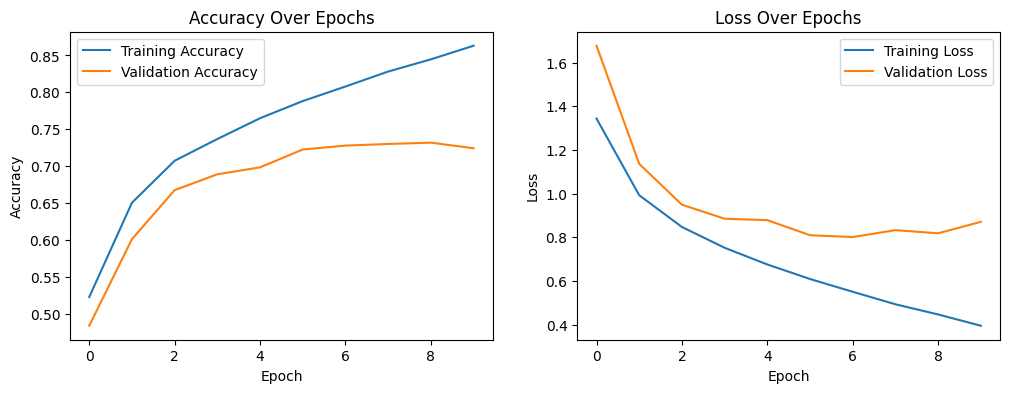

In [9]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

## 4. Evaluation <a name="evaluate"></a>

In [10]:
from sklearn.metrics import confusion_matrix,classification_report

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create a confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# # Print the confusion matrix
# print("Confusion Matrix:")
# print(cm)

print("Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

313/313 [==============================] - 1s 4ms/step - loss: 0.8705 - accuracy: 0.7242
Test Loss: 0.8705
Test Accuracy: 72.42%
313/313 [==============================] - 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1000
           1       0.88      0.79      0.83      1000
           2       0.66      0.57      0.61      1000
           3       0.53      0.54      0.53      1000
           4       0.65      0.74      0.69      1000
           5       0.58      0.69      0.63      1000
           6       0.79      0.81      0.80      1000
           7       0.81      0.75      0.78      1000
           8       0.78      0.88      0.83      1000
           9       0.82      0.78      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.73     10000
weighted avg       0.73      0.72      0.73     10000



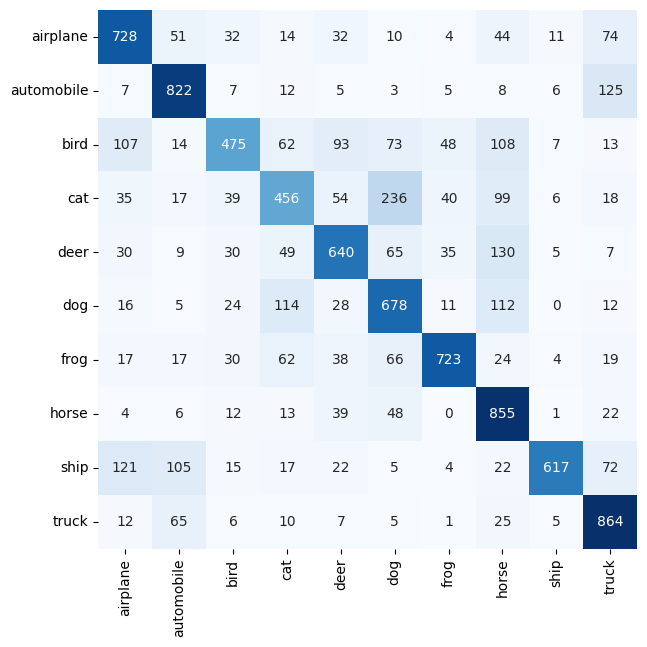

In [ ]:
plt.figure(figsize=(7,7))
labels = class_names
sns.heatmap(cm,xticklabels=labels,yticklabels=labels,annot=True,square=True,fmt=".0f",cmap='Blues',cbar=False);

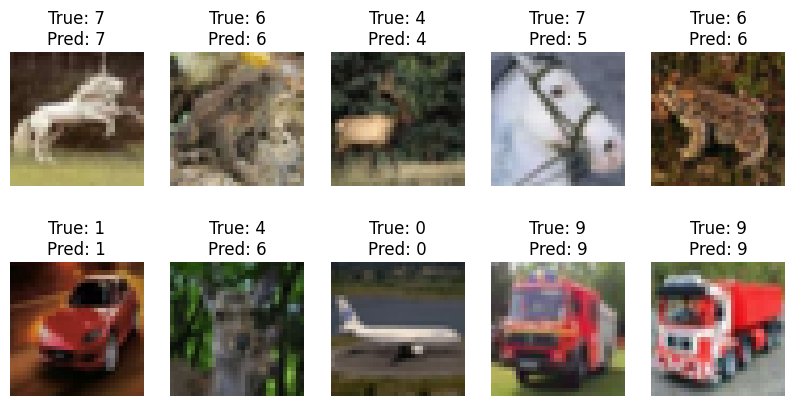

In [11]:
import matplotlib.pyplot as plt
import random

sample= 10 #sample images

sample_indices = random.sample(range(len(X_test)), sample)

# Crea una griglia di subplots per visualizzare le immagini
plt.figure(figsize=(10, 5))
for i, index in enumerate(sample_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[index])
    true_label = np.argmax(y_test[index])
    pred_label = y_pred_classes[index]
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')

plt.show()

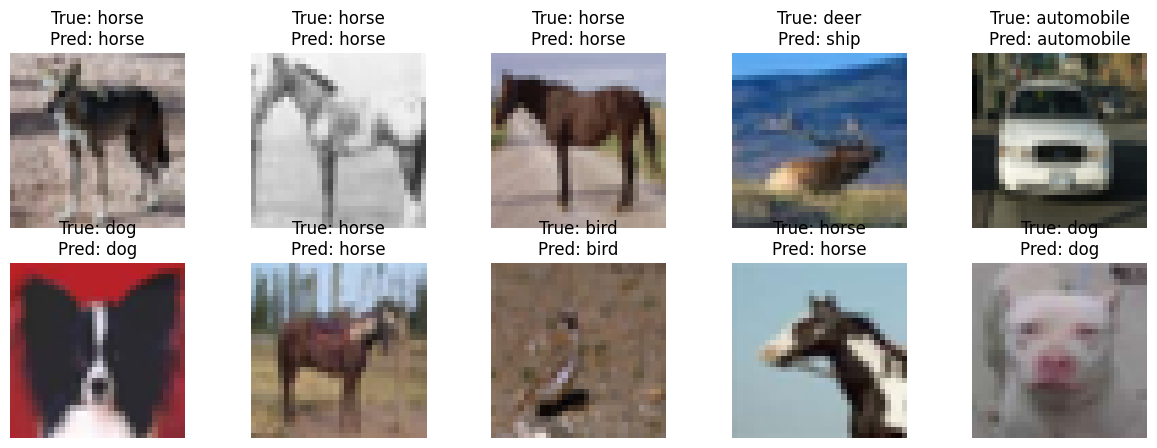

In [12]:
import matplotlib.pyplot as plt
import random

sample= 10 #sample images

# Definisci i nomi delle classi CIFAR-10
class_names = ['airplane',
               'automobile',
               'bird',
               'cat',
               'deer',
               'dog',
               'frog',
               'horse',
               'ship',
               'truck'
               ]

# Scegli 10 indici casuali dal set di test
sample_indices = random.sample(range(len(X_test)), sample)

# Crea una griglia di subplots per visualizzare le immagini
plt.figure(figsize=(15, 5))
for i, index in enumerate(sample_indices):
    plt.subplot(2, 5, i + 1,)
    plt.imshow(X_test[index])
    true_label = class_names[np.argmax(y_test[index])]
    pred_label = class_names[y_pred_classes[index]]
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')

plt.show()